# DS CA4

Written by Babak Hosseini Mohtasham 810101408, Parsa Ahmadi 810101609 and Mahdi Naeini 810101536

## Table of Contents: <a id='top0'></a> 
- [Introduction](#top1)     
- [Warm-Up](#top2)    
- [Main Task](#top3)    
- [Questions](#top4)  

## Introduction: <a id='top1'></a> [](#top0)

Our exploration will center on the Diabetes dataset, a valuable resource provided by the scikit-learn library. This dataset comprises a comprehensive collection of medical diagnostic measurements gathered from a wide array of patients. By leveraging these data points, we aim to predict the quantitative measure of disease progression one year after the baseline, thereby applying regression analysis within a medical framework. This endeavor offers practical insights into the application of machine learning techniques in healthcare settings.

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from scipy.stats import linregress
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


## Warm-Up: <a id='top2'></a> [](#top0)

### 1- load data:
The dataset consists of 442 instances with 10 features

In [2]:
diabetes = load_diabetes(scaled=False)
X = diabetes.data
y = diabetes.target

print("Features shape:", X.shape)
print("Number of instances:", X.shape[0])
print("Number of features:", X.shape[1])
print("-------------------------------")
print("Target shape:", y.shape)

Features shape: (442, 10)
Number of instances: 442
Number of features: 10
-------------------------------
Target shape: (442,)


###  2- Display the first ten rows:
The diabetes dataset consists of 442 instances with the following ten baseline variables:
- Age (age in years)
- Sex
- Body Mass Index (BMI)
- Average Blood Pressure (BP)
- Six blood serum measurements:
    - s1: tc, total serum cholesterol
    - s2: ldl, low-density lipoproteins
    - s3: hdl, high-density lipoproteins
    - s4: tch, total cholesterol / HDL
    - s5: ltg, possibly log of serum triglycerides level
    - s6: glu, blood sugar level

The target variable is a quantitative measure of disease progression one year after baseline.

In [3]:
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target

diabetes_df.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
5,23.0,1.0,22.6,89.0,139.0,64.8,61.0,2.00,4.1897,68.0,97.0
6,36.0,2.0,22.0,90.0,160.0,99.6,50.0,3.00,3.9512,82.0,138.0
7,66.0,2.0,26.2,114.0,255.0,185.0,56.0,4.55,4.2485,92.0,63.0
8,60.0,2.0,32.1,83.0,179.0,119.4,42.0,4.00,4.4773,94.0,110.0
9,29.0,1.0,30.0,85.0,180.0,93.4,43.0,4.00,5.3845,88.0,310.0


In [4]:
diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


### 3- Data types:

We ca see that all features are of type float64, which is the default numeric data type in pandas.

In [5]:
diabetes_df.dtypes

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

### 4- Missing Values:

There are no missing values.

In [6]:
missing_values = diabetes_df.isnull().sum()
missing_values

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

### 5-  Normalizing the features:

In [7]:
diabetes_df_normalized_src = pd.DataFrame(diabetes_df)
diabetes_df_normalized_src[diabetes.feature_names] = (diabetes_df[diabetes.feature_names] - diabetes_df[diabetes.feature_names].min()) / (diabetes_df[diabetes.feature_names].max() - diabetes_df[diabetes.feature_names].min())
X_normalized_src = diabetes_df[diabetes.feature_names].values

diabetes_df_normalized_src.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.666667,1.0,0.582645,0.549296,0.294118,0.256972,0.207792,0.282087,0.562217,0.439394,151.0
1,0.483333,0.0,0.148760,0.352113,0.421569,0.306773,0.623377,0.141044,0.222437,0.166667,75.0
2,0.883333,1.0,0.516529,0.436620,0.289216,0.258964,0.246753,0.282087,0.496578,0.409091,141.0
3,0.083333,0.0,0.301653,0.309859,0.495098,0.447211,0.233766,0.423131,0.572923,0.469697,206.0
4,0.516667,0.0,0.206612,0.549296,0.465686,0.417331,0.389610,0.282087,0.362385,0.333333,135.0
5,0.066667,0.0,0.190083,0.380282,0.205882,0.115538,0.506494,0.000000,0.327003,0.151515,97.0
6,0.283333,1.0,0.165289,0.394366,0.308824,0.288845,0.363636,0.141044,0.243287,0.363636,138.0
7,0.783333,1.0,0.338843,0.732394,0.774510,0.714143,0.441558,0.359661,0.347643,0.515152,63.0
8,0.683333,1.0,0.582645,0.295775,0.401961,0.387450,0.259740,0.282087,0.427955,0.545455,110.0
9,0.166667,0.0,0.495868,0.323944,0.406863,0.257968,0.272727,0.282087,0.746393,0.454545,310.0


In [8]:
scaler = Normalizer()
X_normalized_lib = scaler.fit_transform(X)

diabetes_df_normalized_lib = pd.DataFrame(X_normalized_lib, columns=diabetes.feature_names)
diabetes_df_normalized_lib['target'] = diabetes.target
diabetes_df_normalized_lib.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.246898,0.008369,0.134329,0.422656,0.657000,0.390015,0.159019,0.016739,0.020337,0.364070,151.0
1,0.189493,0.003948,0.085272,0.343455,0.722441,0.407409,0.276343,0.011843,0.015364,0.272396,75.0
2,0.302084,0.008391,0.127966,0.390192,0.654515,0.392709,0.172020,0.016782,0.019605,0.356627,141.0
3,0.088040,0.003668,0.092809,0.308139,0.726328,0.482018,0.146733,0.018342,0.017939,0.326481,206.0
4,0.182625,0.003652,0.084007,0.368902,0.701279,0.458023,0.189930,0.014610,0.015671,0.292199,135.0
5,0.113800,0.004948,0.111820,0.440355,0.687745,0.320618,0.301816,0.009896,0.020730,0.336451,97.0
6,0.153991,0.008555,0.094106,0.384978,0.684406,0.426043,0.213877,0.012833,0.016901,0.350758,138.0
7,0.183808,0.005570,0.072966,0.317487,0.710168,0.515220,0.155958,0.012672,0.011832,0.256218,63.0
8,0.229321,0.007644,0.122686,0.317227,0.684140,0.456348,0.160524,0.015288,0.017112,0.359269,110.0
9,0.118661,0.004092,0.122752,0.347799,0.736515,0.382169,0.175945,0.016367,0.022032,0.360074,310.0


In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(diabetes_df.drop('target', axis=1))

diabetes_df_scaled = pd.DataFrame(X_scaled, columns=diabetes.feature_names)
diabetes_df_scaled['target'] = diabetes.target
diabetes_df_scaled.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989,151.0
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479,75.0
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154,141.0
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823,206.0
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568,135.0
5,-1.948811,-0.938537,-0.855583,-0.408741,-1.450445,-1.666931,0.867796,-1.606102,-0.865679,-2.025562,97.0
6,-0.956004,1.065488,-0.991541,-0.336359,-0.842963,-0.521390,0.016374,-0.830301,-1.322752,-0.806403,138.0
7,1.335088,1.065488,-0.039834,1.400804,1.905174,2.289794,0.480786,0.372192,-0.752992,0.064426,63.0
8,0.876870,1.065488,1.297088,-0.843032,-0.293335,0.130383,-0.602843,-0.054499,-0.314510,0.238591,110.0
9,-1.490592,-0.938537,0.821235,-0.698268,-0.264408,-0.725481,-0.525441,-0.054499,1.424090,-0.283906,310.0


### 6- train test split:
Split the data into training and testing sets using a standard ratio (95% training, 5% testing).

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.05, random_state=42)

### 7- Confirming Dataset Splits:

In [11]:
print("Number of instances in the training set:", len(X_train))
print("Number of instances in the testing set:", len(X_test))

Number of instances in the training set: 419
Number of instances in the testing set: 23


## Main Task: <a id='top3'></a> [](#top0)

### 1- Functions’ Implementation:

- **Mean Squared Error (MSE)**: MSE is the average of the squares of the errors, which are the differences between the predicted and actual values.

- **Mean Absolute Error (MAE)**: MAE is the average of the absolute differences between the predicted and actual values.

- **Root Mean Squared Error (RMSE)**: RMSE is the square root of the MSE. It's a measure of the differences between values predicted by a model and the values actually observed.

- **R² Score (Coefficient of Determination)**: R² Score is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

$$
    R^{2} = 1 - \frac{RSS}{TSS} = 1 - \frac{\sum_{i=1}^{n}\left ( y_{i} - \widehat{y_{i}} \right )^{2}}{\sum_{i=1}^{n}\left ( y_{i} - \mu \right )^{2}}
$$

In [12]:
def get_mean_squared_error(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

def get_mean_absolute_error(y_true, y_pred):
    return np.abs(y_true - y_pred).mean()

def get_root_mean_squared_error(y_true, y_pred):
    return np.sqrt(get_mean_squared_error(y_true, y_pred))

def get_r_squared(y_true, y_pred):
    rss = np.sum((y_true - y_pred) ** 2)
    tss = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (rss / tss)

### 2- Building and Training the Linear Regression Model:

In [13]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
print("Coefficients: \n", regr.coef_)

Coefficients: 
 [  0.60703929 -12.25427984  25.32435581  16.18598155 -40.35269295
  22.94925049   6.58450193  11.73440494  33.65325583   2.89861994]


### 3- Model Evaluation:

In [19]:
def plot_actual_vs_predicted_for_train_data(X ,y_true, y_pred):
    plt.figure(figsize=(6, 5))
    plt.scatter(y_true, y_pred, alpha=0.8, color= "blue")
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted')
    plt.show()

def plot_actual_vs_predicted(X ,y_true, y_pred):
    plt.figure(figsize=(12, 5))
    plt.subplot(1,2,1)
    plt.plot(np.arange(len(X)), y_true, color="r", linewidth=1, label= "Actual")
    plt.plot(np.arange(len(X)), y_pred, color="b", linewidth=1, label= "Predicted")

    plt.xlabel('sample index')
    plt.ylabel('Values')
    plt.title('Actual vs Predicted')
    plt.legend()

    plt.subplot(1,2,2)
    plt.scatter(y_true, y_pred, alpha=0.8, color= "blue")
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)

    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted')
    plt.show()

def evaluate_regression_model(y_train, y_train_pred, y_test, y_test_pred):
    mse_train = get_mean_squared_error(y_train, y_train_pred)
    mae_train = get_mean_absolute_error(y_train, y_train_pred)
    rmse_train = get_root_mean_squared_error(y_train, y_train_pred)
    r2_train = get_r_squared(y_train, y_train_pred)

    mse_test = get_mean_squared_error(y_test, y_test_pred)
    mae_test = get_mean_absolute_error(y_test, y_test_pred)
    rmse_test = get_root_mean_squared_error(y_test, y_test_pred)
    r2_test = get_r_squared(y_test, y_test_pred)

    metrics_df = pd.DataFrame({
        'Data Type/Optimizer': ['Train Set','Test Set'],
        'MSE': [mse_train, mse_test], 
        'MAE': [mae_train, mae_test], 
        'RMSE': [rmse_train, rmse_test], 
        'R² Score': [r2_train, r2_test]
    })

    return metrics_df

Compare the predicted values with the actual progression measures using a scatter plot.

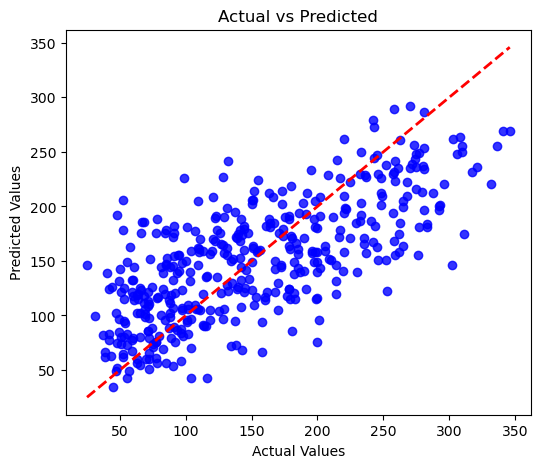

In [20]:
# Train Set
y_train_pred = regr.predict(X_train)
plot_actual_vs_predicted_for_train_data(X_train, y_train, y_train_pred)

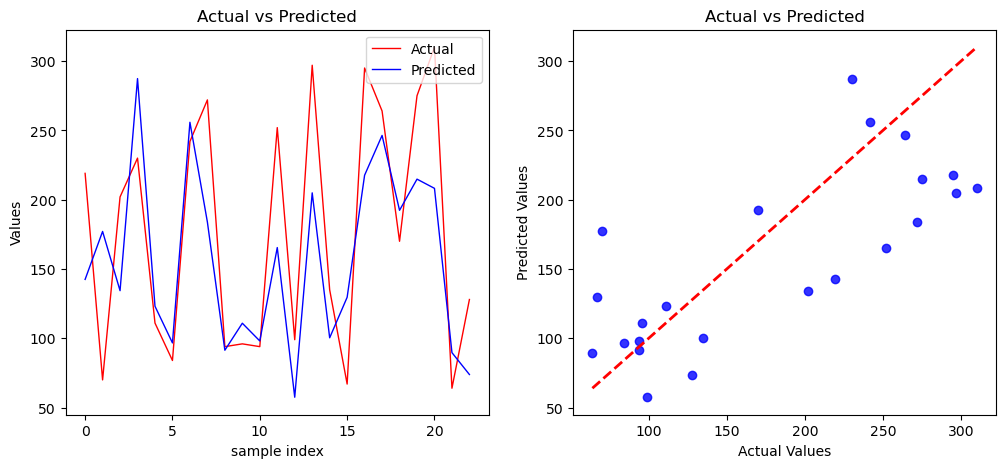

In [21]:
# Test set
y_test_pred = regr.predict(X_test)
plot_actual_vs_predicted(X_test, y_test, y_test_pred)

Evaluate the regression model on the training and testing data using the followingfunctions:

- MSE
- MAE
- RMSE
- R² score


In [22]:
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)
metrics_df = evaluate_regression_model(y_train, y_train_pred, y_test, y_test_pred)
metrics_df

,Data Type/Optimizer,MSE,MAE,RMSE,R² Score
0,Train Set,2831.219526,42.963837,53.209205,0.513588
1,Test Set,3516.110866,49.278320,59.296803,0.516379


### 4- Ordinary Least Squares:

Since scipy does not have a direct OLS function like statsmodels, we can use scipy.stats.linregress for simple linear regression or statsmodels.api.OLS for multiple linear regression. For the diabetes dataset, which is a multiple linear regression problem, we should use statsmodels.

In [23]:
X_single = X[:, 0]
X_train_single, X_test_single, y_train, y_test = train_test_split(X_single, y, test_size=0.05, random_state=42)
slope, intercept, r_value, p_value, std_err = linregress(X_train_single, y_train)
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")

Slope: 1.0754824800907137
Intercept: 98.6189665143601
R-squared: 0.03354243688233001
P-value: 0.00016348546013247295
Standard Error: 0.2827023387950177


In [24]:
X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     43.08
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           7.57e-58
Time:                        14:44:01   Log-Likelihood:                -2259.7
No. Observations:                 419   AIC:                             4541.
Df Residuals:                     408   BIC:                             4586.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        151.0749      2.635     57.329      0.0

## Questions: <a id='top4'></a> [](#top0)

### 1- Analyze and evaluate the values in Table (1).

In [25]:
evaluate_regression_model(y_train, y_train_pred, y_test, y_test_pred)

,Data Type/Optimizer,MSE,MAE,RMSE,R² Score
0,Train Set,2831.219526,42.963837,53.209205,0.513588
1,Test Set,3516.110866,49.278320,59.296803,0.516379


- **MSE (Mean Squared Error)**: Generally lower on the training set than the test set, which is expected. A lower MSE indicates a better fit on the training data. However, a large difference between train and test MSE suggests overfitting.

- **MAE and RMSE**: Given that the average target value for the samples is 152.133, the observed error rates indicate a significant deviation from the expected outcomes. This suggests that the model's predictions are not aligning well with the actual data.

- **R² Score (R-squared)**: Very similar between train and test sets. An R² score of 0.5 indicates a moderate positive linear relationship between the predicted and actual values.

Overall, the model seems to have a moderate performance based on the R² score.

### 2- Review the R² and Adjusted R² values obtained in part 4. Explain what these values indicate and what the implications of high or low values might be. Also, discuss the differences between these two metrics.

R-squared:                       0.514

Adj. R-squared:                  0.502

The R-squared (R²) and Adjusted R-squared values obtained from my model are metrics used to evaluate the goodness of fit of a regression model.

- R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, where 0 indicates that the model does not explain any variability, and 1 indicates that it explains all the variability. Higher R-squared values suggest a better fit, but it doesn’t necessarily mean the model is a good predictor in an absolute sense. The main issue with R-squared is that it tends to increase as more variables are added to the model, even if they don’t improve the model significantly. This can give a falsely optimistic view of the model's performance.

- Adjusted R-squared addresses the limitation of R-squared, especially in multiple regression (models with more than one independent variable). While R-squared tends to increase as more variables are added to the model, Adjusted R-squared penalizes the addition of unnecessary variables. It considers the number of predictors in the model and adjusts R-squared accordingly. This adjustment helps to avoid overfitting, providing a more accurate measure of the model’s goodness of fit. Adjusted R-squared is more conservative and will decrease if additional variables do not contribute to the model’s explanatory power.

The implications of high or low values for both metrics are as follows:

- High R-squared and Adjusted R-squared values indicate that the model explains a large proportion of the variance in the dependent variable, suggesting a good fit. However, a high R-squared value does not necessarily mean the model is a good predictor, as it can be misleading when too many variables are included in the model.

- Low R-squared and Adjusted R-squared values indicate that the model does not explain much of the variance in the dependent variable, suggesting a poor fit. This could mean that the model is not capturing the underlying patterns in the data well, or that the predictors included in the model are not relevant.


### 3- Review the p-values obtained in part 4 for each column of data and explain what these values indicate. Discuss what an appropriate value for p-values is and which columns currently have suitable values.

The p-values in the regression output indicate the statistical significance of each predictor (independent variable) in the model. A p-value is a measure of the probability that an observed difference could have occurred just by random chance. In the context of regression analysis, a low p-value (typically less than 0.05) suggests that the predictor is statistically significant, meaning that changes in the predictor's value are related to changes in the response variable. Conversely, a high p-value suggests that the predictor is not statistically significant, indicating that changes in the predictor are not associated with changes in the response variable.

In my regression output, the p-values for the predictors are as follows:

- const: 0.000 (statistically significant)
- x1: 0.836 (not statistically significant)
- x2: 0.000 (statistically significant)
- x3: 0.000 (statistically significant)
- x4: 0.000 (statistically significant)
- x5: 0.045 (statistically significant)
- x6: 0.160 (not statistically significant)
- x7: 0.520 (not statistically significant)
- x8: 0.140 (not statistically significant)
- x9: 0.000 (statistically significant)
- x10: 0.365 (not statistically significant)

The appropriate value for p-values is less than 0.05, which is a common threshold used to determine statistical significance. Predictors with p-values less than 0.05 are considered to have a statistically significant relationship with the response variable. In my model, the predictors x2, x3, x4, x5, x9, and the constant term have p-values less than 0.05, indicating that they are statistically significant. The other predictors (x1, x6, x7, x8 and x10) have p-values greater than 0.05, suggesting that they are not statistically significant in this model.

It's important to note that the presence of multicollinearity (high correlation among predictors) can make it difficult to determine the significance of individual predictors. Multicollinearity can inflate the variance of the regression coefficients, making them appear statistically insignificant even when they are not. In such cases, it might be beneficial to consider other model selection techniques or regularization methods like LASSO or Ridge regression to handle multicollinearity

### 4- Assess and analyze the importance of each feature in the dataset based on the results obtained in part 4 regarding an individual's diabetic condition.

Based on the regression results provided, we can assess the importance of each feature in the diabetes dataset by examining the p-values and the coefficients of the predictors. The p-value is a measure of the statistical significance of each predictor in the model. A low p-value (typically less than 0.05) indicates that the predictor is statistically significant, meaning that changes in the predictor's value are related to changes in the response variable. Conversely, a high p-value suggests that the predictor is not statistically significant, indicating that changes in the predictor are not associated with changes in the response variable.

From the regression summary, the predictors with p-values less than 0.05 are considered statistically significant and have a strong influence on the model's predictions. These predictors are:

- x2: Sex
- x3: Body Mass Index (BMI)
- x4: Average Blood Pressure (BP)
- x5: s1: tc, total serum cholesterol
- x9: s5: ltg, possibly log of serum triglycerides level

The predictors with p-values greater than 0.05 are not statistically significant and have a weaker influence on the model's predictions. These predictors are:

- x1: Age
- x6: ldl, low-density lipoproteins
- x7: hdl, high-density lipoproteins
- x8: tch, total cholesterol / HDL
- x10: glu, blood sugar level

The constant term (const) is not a feature but represents the intercept of the model.

The coefficients of the predictors indicate the change in the response variable for a one-unit change in the predictor, holding all other predictors constant. For example, a coefficient of 1 for x1 (Age) means that for each additional year of age, the response variable increases by 1, assuming all other variables remain constant.

The high R-squared value (0.514) suggests that the model explains a significant portion of the variance in the response variable, indicating that the selected features are important in predicting disease progression. However, the presence of multicollinearity suggests that some of the predictors are highly correlated, which can make it difficult to determine the individual contribution of each predictor to the model.